## Performance 

Text(0, 0.5, 'Total travel time (s)')

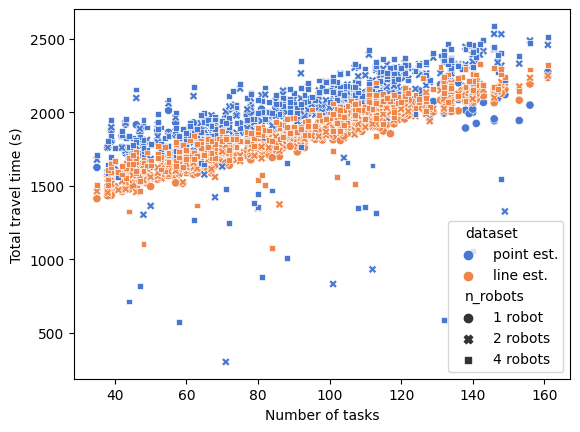

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
ours_naive = "benchmarks/AC300/ours_naive_1robots_infcapacity_AC300.csv"
ours = "benchmarks/AC300/ours_1robots_infcapacity_AC300.csv"
ours_naive_2r = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours_2r = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_2r_df = pd.read_csv(ours_naive_2r)
ours_2r_df = pd.read_csv(ours_2r)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="line est.").assign(n_robots="1 robot"),
        ours_naive_2r_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_2r_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)
sns.set_palette('muted')
sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset", style="n_robots")
plt.xlabel('Number of tasks')
plt.ylabel('Total travel time (s)')



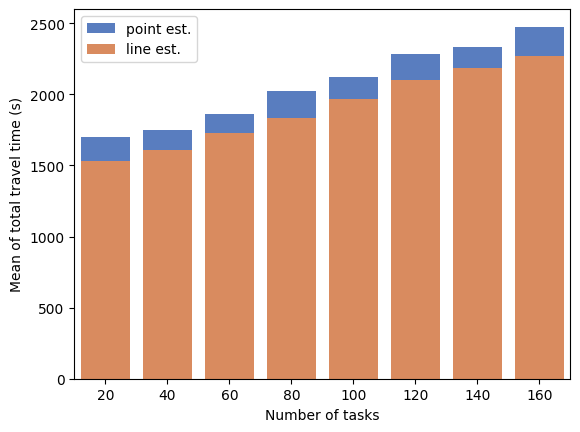

In [23]:
ours_naive_df = pd.read_csv("benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv")
ours_naive_1r_df = pd.read_csv("benchmarks/AC300/ours_naive_1robots_infcapacity_AC300.csv")
ours_naive_4r_df = pd.read_csv("benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv")
ours_df = pd.read_csv("benchmarks/AC300/ours_2robots_1200capacity_AC300.csv")
ours_1r_df = pd.read_csv("benchmarks/AC300/ours_1robots_infcapacity_AC300.csv")
ours_4r_df = pd.read_csv("benchmarks/AC300/ours_4robots_600capacity_AC300.csv")

df1 = pd.concat(
    [
        ours_df.assign(dataset="line est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

df2 = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="1 robot"),
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
    ]
)

# Combine the two DataFrames into one
df = pd.concat([df1, df2], keys=['line est.', 'point est.']).reset_index()

# Divide the DataFrame into bins of size 5
bins = range(20, 199, 20)
labels = [f'{i}' for i in bins[:-1]]
df['group'] = pd.cut(df['num_tasks'], bins=bins, labels=labels)

# Create a pivot table to calculate the mean income for each age group and dataset
pivot_df = pd.pivot_table(df, values='totalRouteCosts', index='group', columns='level_0', aggfunc='mean')

# Create a stacked bar chart with error bars using seaborn

sns.barplot(x=pivot_df.index, y=pivot_df['point est.'], color=(0.2823529411764706, 0.47058823529411764, 0.8156862745098039), label='point est.')
sns.barplot(x=pivot_df.index, y=pivot_df['line est.'], color=(0.9333333333333333, 0.5215686274509804, 0.2901960784313726), label='line est.')

plt.xlabel('Number of tasks')
plt.ylabel('Mean of total travel time (s)')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


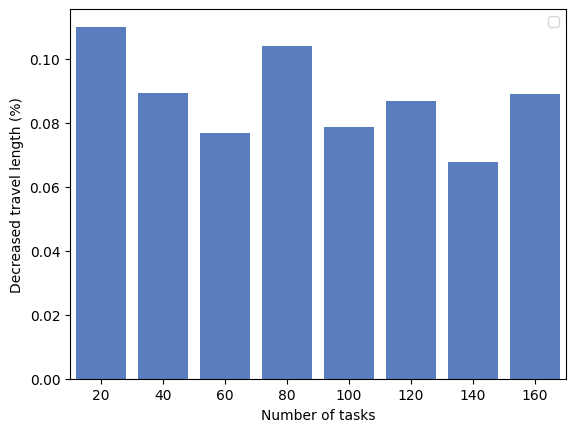

In [24]:
# Combine the two DataFrames into one
df = pd.concat([df1, df2], keys=['line est.', 'point est.']).reset_index()

# Divide the DataFrame into bins of size 5
bins = range(20, 199, 20)
labels = [f'{i}' for i in bins[:-1]]
df['group'] = pd.cut(df['num_tasks'], bins=bins, labels=labels)

# Create a pivot table to calculate the mean income for each age group and dataset
pivot_df = pd.pivot_table(df, values='totalRouteCosts', index='group', columns='level_0', aggfunc='mean')

# Create a stacked bar chart with error bars using seaborn

sns.barplot(x=pivot_df.index, y=pivot_df[['line est.', 'point est.']].pct_change(axis=1)['point est.'], color=(0.2823529411764706, 0.47058823529411764, 0.8156862745098039))
plt.xlabel('Number of tasks')
plt.ylabel('Decreased travel length (%)')
plt.legend()
plt.show()

In [25]:
# Calculate the performance increase between naive and ours
print("ours: ",df2["totalRouteCosts"].mean(),df2["totalRouteCosts"].std()*100 /df2["totalRouteCosts"].mean())
print("ours: ",df1["totalRouteCosts"].mean(),df1["totalRouteCosts"].std()*100 / df1["totalRouteCosts"].mean())

print("Improvement over naive: ", (df2["totalRouteCosts"].mean()-df1["totalRouteCosts"].mean())/df2["totalRouteCosts"].mean()*100)

ours:  2004.1789693133137 14.233001651506768
ours:  1846.0848023916733 11.055088497093665
Improvement over naive:  7.888226018847397


<Axes: xlabel='num_tasks', ylabel='totalRouteCosts'>

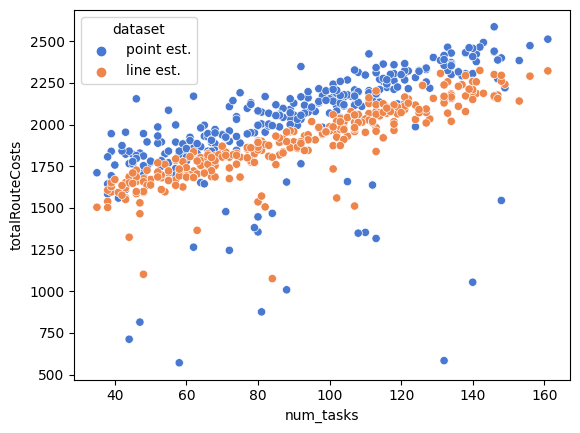

In [26]:
ours_naive = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])

sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset")

## Convergence

ours iteration mean 43.163333333333334
ours iteration std 23.62081989822616
naive iteration mean 48.56333333333333
naive iteration std 35.21048968942996


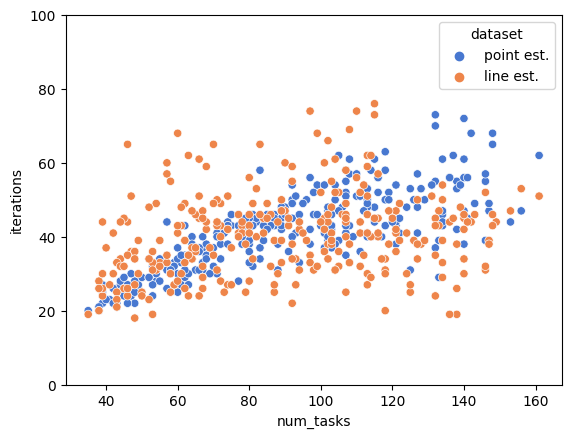

In [27]:
# ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
# ours = "benchmarks/ours_4robots_600capacity_AC300.csv"
ours_naive = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])
sns.set_palette('muted')

plt.ylim(0, 100)
sns.scatterplot(data=concatenated, x="num_tasks", y="iterations", hue="dataset")

# Merge the two DataFrames on the 'Key' column
merged_df = pd.merge(ours_naive_df, ours_df, on='dataset_name', suffixes=('_ours', '_naive'))

print("ours iteration mean", ours_df["iterations"].mean())
print("ours iteration std", ours_df["iterations"].std())
print("naive iteration mean",ours_naive_df["iterations"].mean())
print("naive iteration std",ours_naive_df["iterations"].std())

## Computation time

<Axes: xlabel='num_tasks', ylabel='computeTime'>

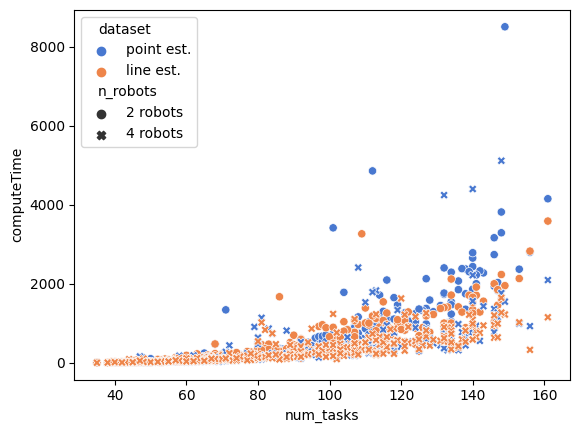

In [28]:
ours_naive = "benchmarks/AC300/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/AC300/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/AC300/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/AC300/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

sns.scatterplot(data=concatenated, x="num_tasks", y="computeTime", hue="dataset", style="n_robots")

## Iteration comparison

[Text(0.5, 0, 'Number of agents'), Text(0, 0.5, 'Number of iterations')]

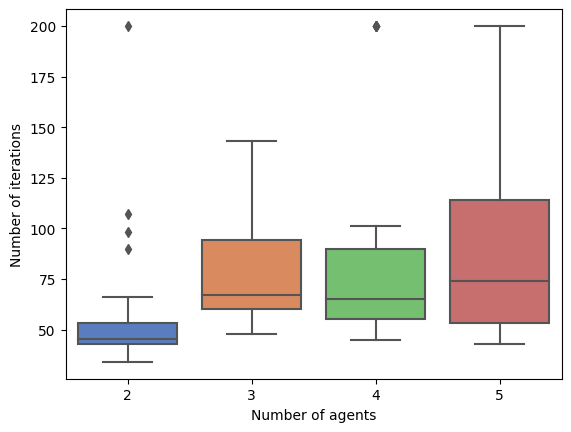

In [29]:
# TODO compare the sum of the costs of all the routes with the routes generated by agarwal
# BUT be 100% clear about the difference in colision checking
one_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_1robots_1600capacity_repeat30_VM25_13.csv")
two_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_2robots_1200capacity_repeat30_VM25_13.csv")
three_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_3robots_800capacity_repeat30_VM25_13.csv")
four_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_4robots_480capacity_repeat30_VM25_13.csv")
five_robot_30_samples = pd.read_csv("benchmarks/VM25/ours_5robots_400capacity_repeat30_VM25_13.csv")

one_robot_30_samples[["iterations", "number_of_agents"]]
concatenated = pd.concat(
    [
        two_robot_30_samples,
        three_robot_30_samples,
        four_robot_30_samples,
        five_robot_30_samples,
    ]
)
sns.set_palette('muted')

fig = sns.boxplot(data=concatenated,x="number_of_agents", y="iterations")
fig.set(xlabel='Number of agents', ylabel='Number of iterations')
